# Loan Data Analysis

## Problem description

**When a loan application is received it is either approved or declined based on a certain criteria.**
**We have to be careful during analysis of such loan applications as if we lend to risky customers who are likely to default then it could have negative impact on bussiness. Also if we decline a loan to a potential customer who could have paid back the loan then it is a loss of bussiness as well.**

**In this project we will first clean the data then analyse it and give some recommendations based on our findings.**

In [77]:
#making the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [78]:
#reading the data file
loan = pd.read_csv('loan.csv', sep = ',')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [79]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data cleaning

In [80]:
#checking for nulls 
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [81]:
#percentage of missing values 

round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [82]:
# getting those columns which have more than 90% of missing data
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [83]:
#drop these columns
loan.drop(missing_columns, axis =1, inplace = True)

In [84]:
#checking the shape
loan.shape

(39717, 55)

In [85]:
#summarize the missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [86]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent

# let's have a look at a few entries in the columns

loan.loc[:, ['desc', 'mths_since_last_delinq']].sample(20)

,desc,mths_since_last_delinq
21485,NaN,NaN
15381,Borrower added on 05/08/11 > i plan on payin...,NaN
36564,I have an annual income of 48k and currently h...,NaN
8217,NaN,11.0
20667,Borrower added on 01/15/11 > This loan is go...,NaN
11295,Borrower added on 07/15/11 > &gt; 750 Excell...,NaN
23988,NaN,NaN
12077,Borrower added on 07/01/11 > Pool<br/> Borro...,NaN
16570,Borrower added on 04/27/11 > wishing to cons...,NaN
34861,I would like to apply for a business loan to s...,NaN


The column description contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in this analysis.

Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

Thus let's drop the two columns.

In [87]:
#drop columns
loan.drop(['desc', 'mths_since_last_delinq'], axis = 1, inplace = True)

#checking the percentage of missing values
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [88]:
#checking if rows have missing values
loan.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [89]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [90]:
#lets check if data types of columns is correct
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [91]:
#convert the int_rate column to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))


In [92]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [93]:
#checking again the dtypes of columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

## Data Analysis

*The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.)*

*Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.*

*Thus, going forward, we will use only the first two types of variables.*

In [94]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [95]:
#droping the behavior variables as these are not available at the time of approving the loan. 
df = loan.drop(behaviour_var, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [96]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [97]:
#lets convert the dtype to category for loan status column
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

*As the current type are the ones who are in the process of paying back the loan. so we can drop them.*


In [98]:
#create new df without the customers with current status

df = df[df['loan_status'] != 'Current']

#convert the remaining to zero or ones
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)



In [99]:
#convert the data type to numeric
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

#get the value counts
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis

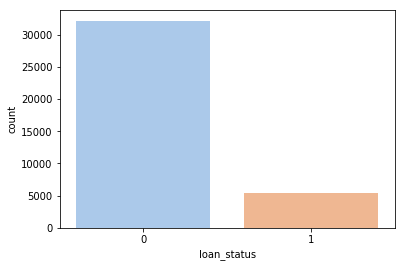

In [100]:
#checking the defaults vs fully paid

sns.countplot(df['loan_status'], palette = 'pastel')
plt.show()

In [101]:
#checking the default ratio

default_ratio = df['loan_status'].mean()
default_ratio

0.14380460259961644

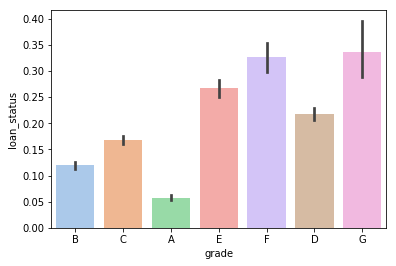

In [102]:
#plotting the default rates across grades
sns.barplot(x = 'grade', y= 'loan_status', data = df, palette = 'pastel')
plt.show()

In [103]:
#define the plotting function

def plot_category(category):
    
    sns.barplot(x = category, y = 'loan_status', data = df, palette = 'pastel')
    plt.show()

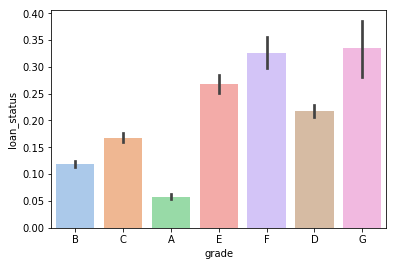

In [104]:
#checking to see if our function is working fine

plot_category('grade')

*Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.*

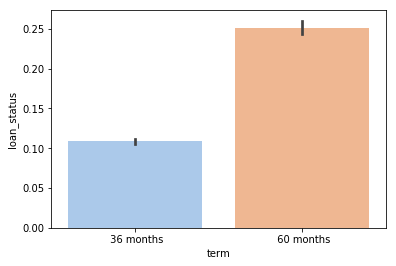

In [105]:
#checking for the term
plot_category('term')

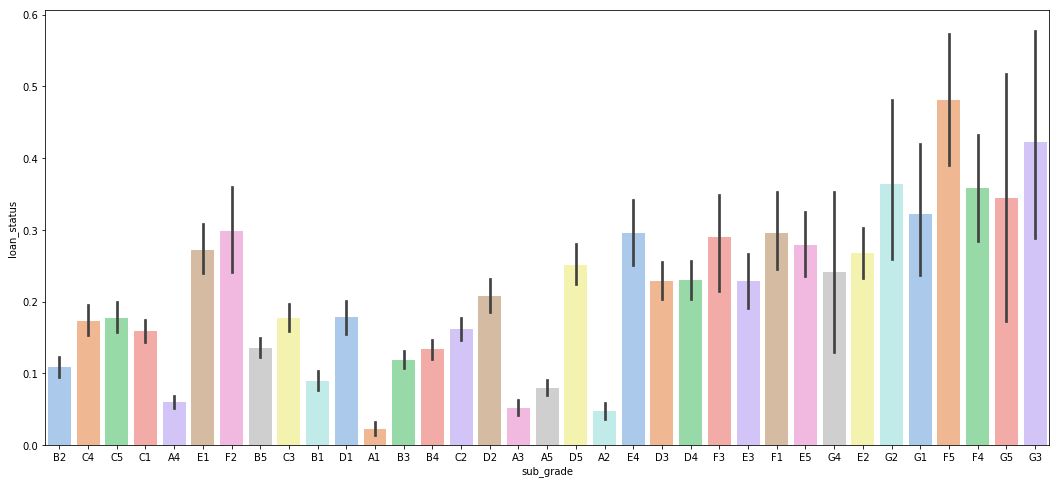

In [106]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 

plt.figure(figsize = (18,8))
plot_category('sub_grade')

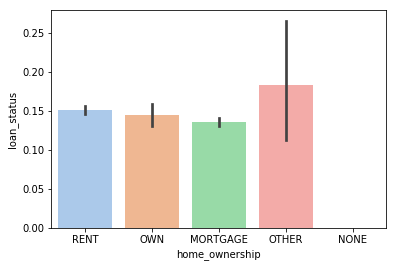

In [107]:
#home ownership is not a good discriminator
plot_category('home_ownership')

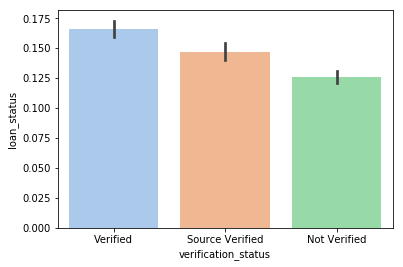

In [108]:
# verification_status: surprisingly, verified loans default more than not verified ones. Verification team needs to
# reconsider the verification criteria
plot_category('verification_status')

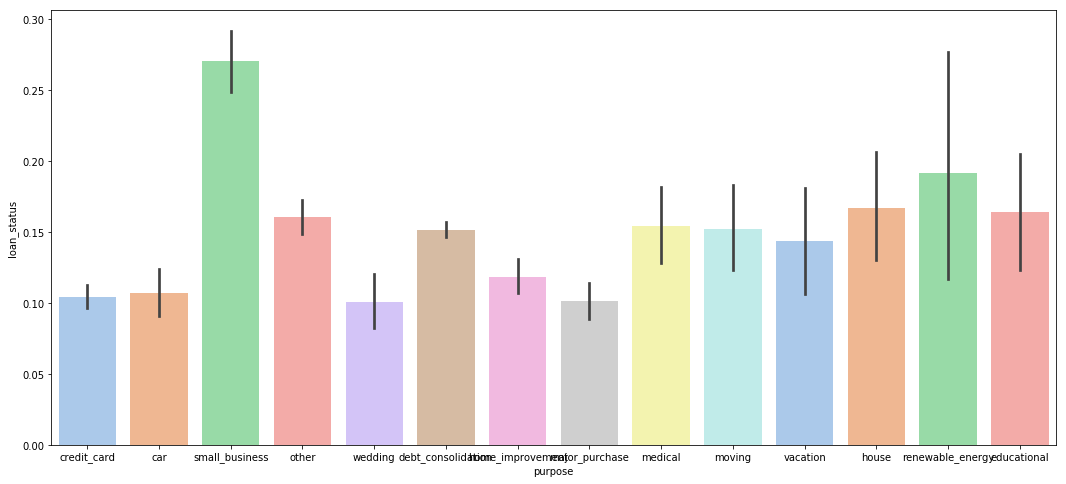

In [109]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(18, 8))
plot_category('purpose')


In [110]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [111]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

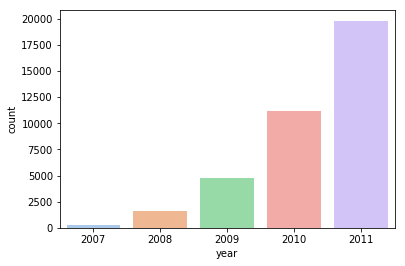

In [112]:
#counts of year. Loans are increasing year upon year. 
sns.countplot(df['year'], palette = 'pastel')
plt.show()

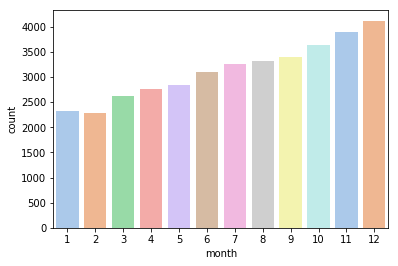

In [113]:
#counts of month. More loans in second half of year
sns.countplot(df['month'], palette = 'pastel')
plt.show()

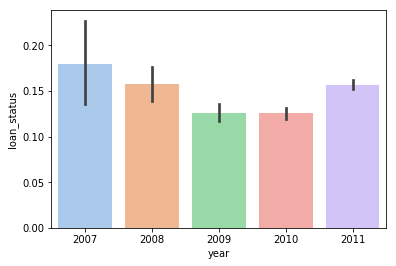

In [114]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_category('year')

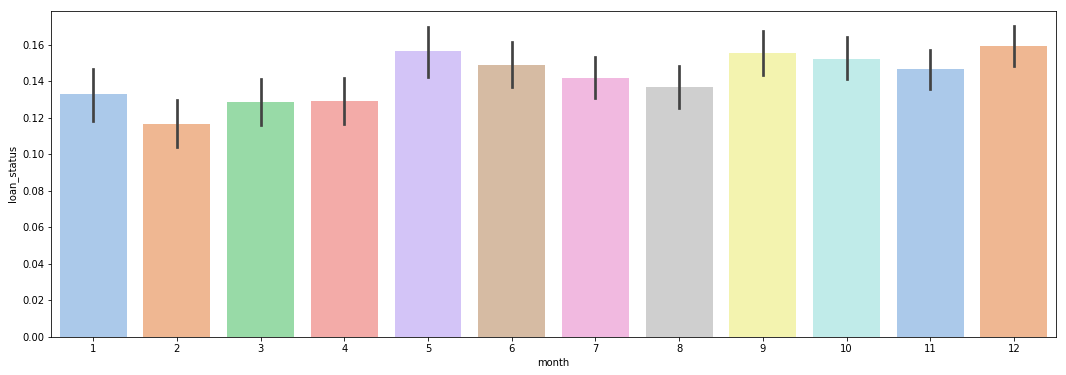

In [115]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(18, 6))
plot_category('month')

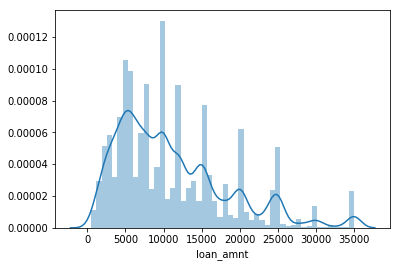



11119.329986149585


In [116]:
#plot the loan amount
sns.distplot(df['loan_amnt'])
plt.show()

print('\n')
print(df['loan_amnt'].mean())

*The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.*

*Let's bin the loan amount variable into small, medium, high, very high.*

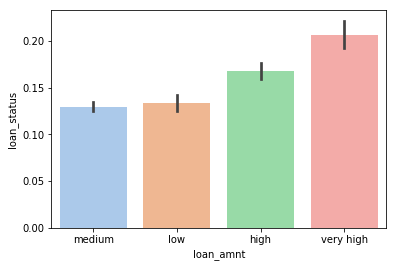

In [117]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_category('loan_amnt')

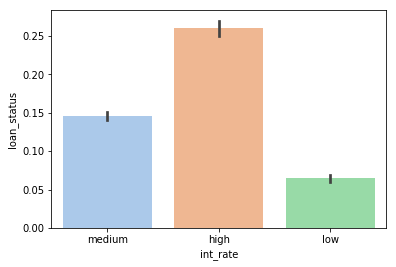

In [118]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_category('int_rate')

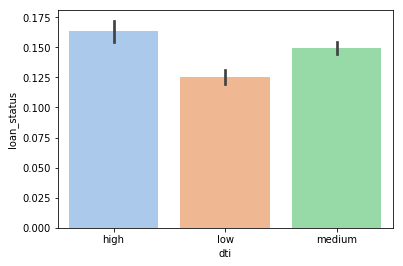

In [119]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_category('dti')

In [120]:
# funded amount binning
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))



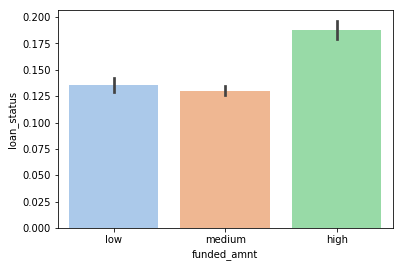

In [122]:
#higher funded amount have high risk of default. 
plot_category('funded_amnt')

In [123]:
#installment binning
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

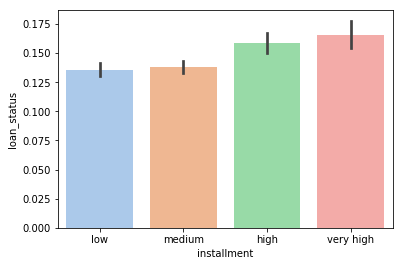

In [124]:
#plot the installments
# the higher the installment amount, the higher the default rate
plot_category('installment')

In [125]:
# annual income binning

def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

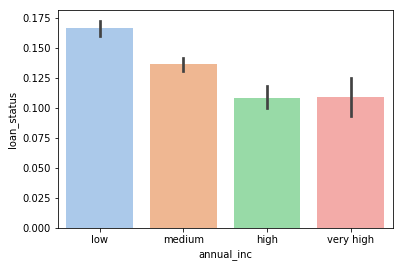

In [126]:
# as expected, higher the income lower the default rate
plot_category('annual_inc')

In [127]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

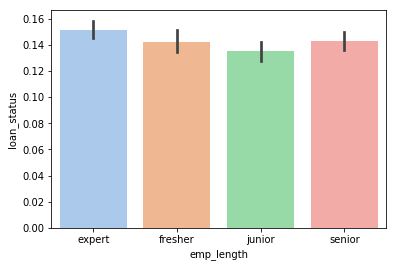

In [128]:
#employment length is not a good indictor about default rate. 
plot_category('emp_length')

## Segmented Univariate Analysis

*We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.*

*In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.*

*This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.*

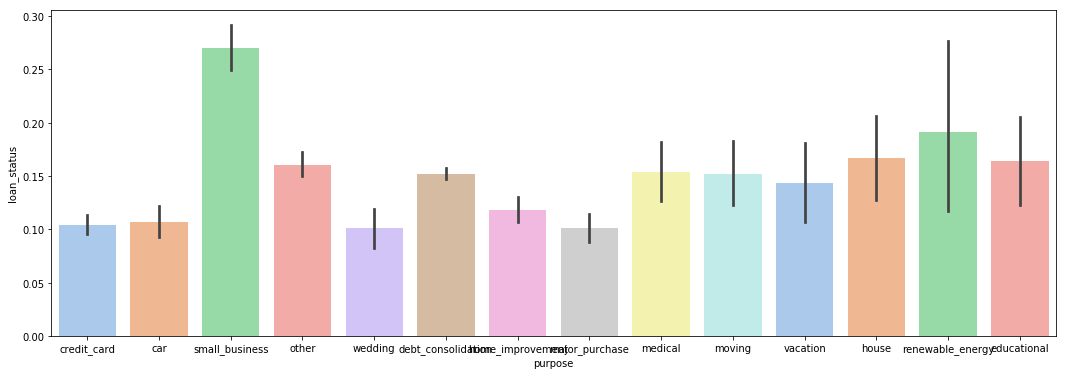

In [129]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(18, 6))
plot_category('purpose')

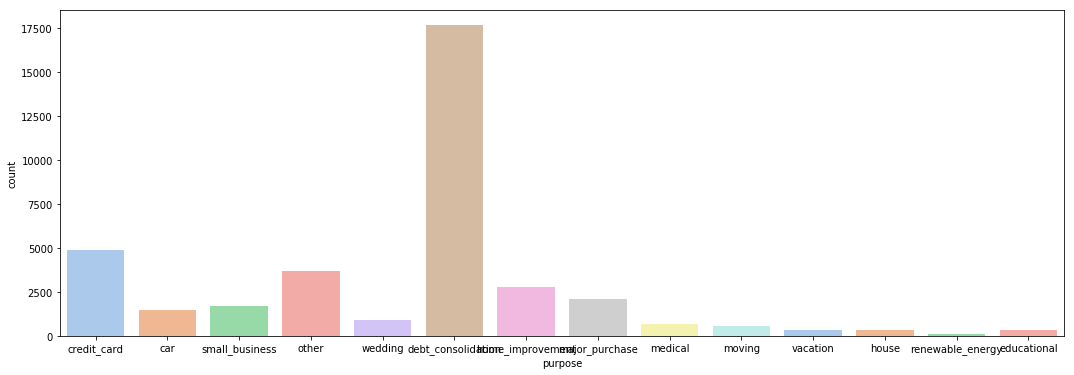

In [130]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay other debts), then credit card, major purchase etc.
plt.figure(figsize=(18, 6))
sns.countplot(x='purpose', data=df, palette = 'pastel')
plt.show()

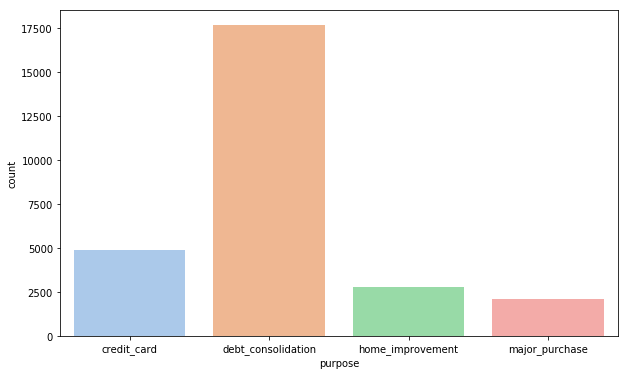

In [132]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]

# plotting number of loans by purpose 
plt.figure(figsize = (10,6))
sns.countplot(x=df['purpose'], palette = 'pastel')
plt.show()

## Bivariate Analysis

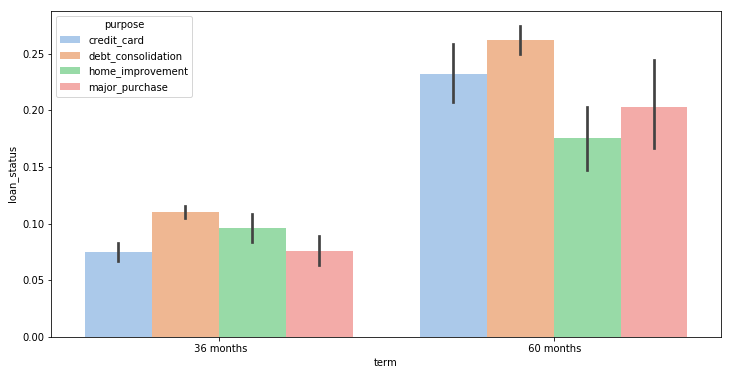

In [133]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[12, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df, palette = 'pastel')
plt.show()


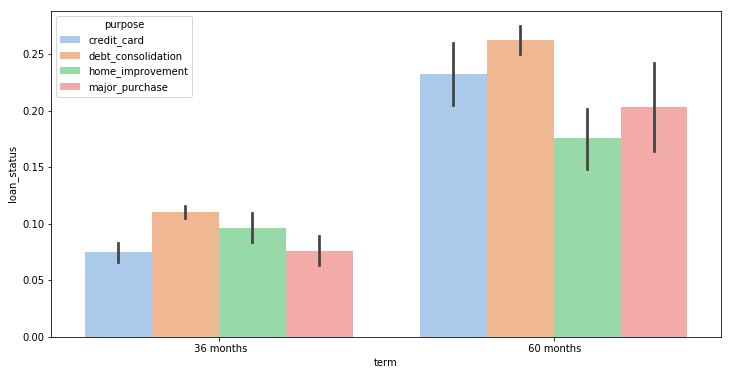

In [135]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df, palette = 'pastel')
    plt.show()

    
plot_segmented('term')

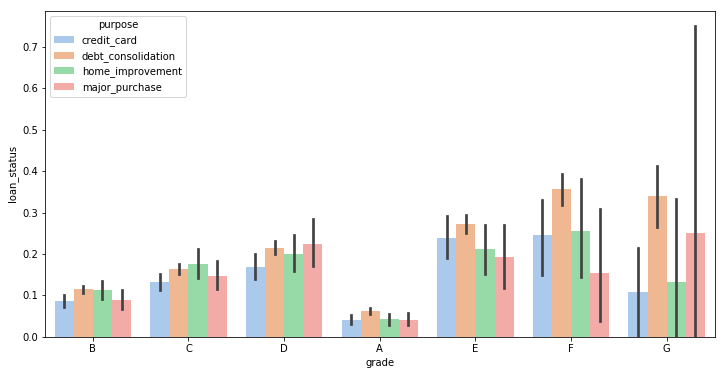

In [136]:
#checking for grade
plot_segmented('grade')

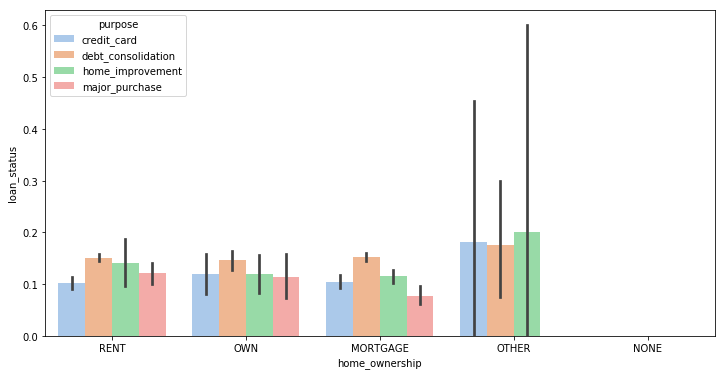

In [137]:
#home ownership
plot_segmented('home_ownership')

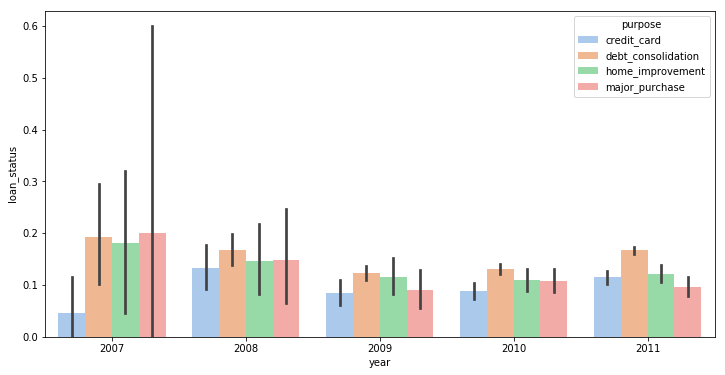

In [138]:
#checking against the year
plot_segmented('year')

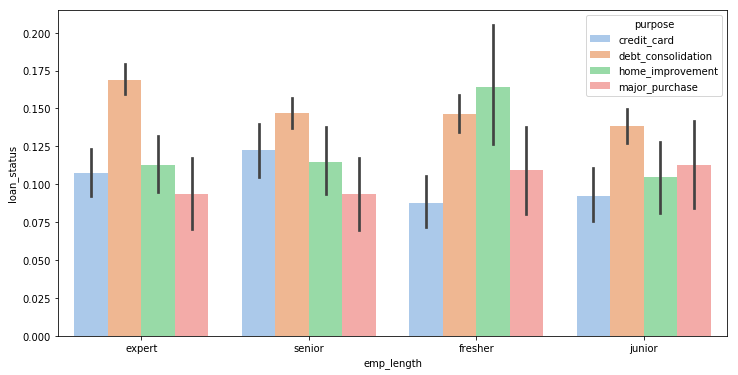

In [139]:
#emp length

plot_segmented('emp_length')

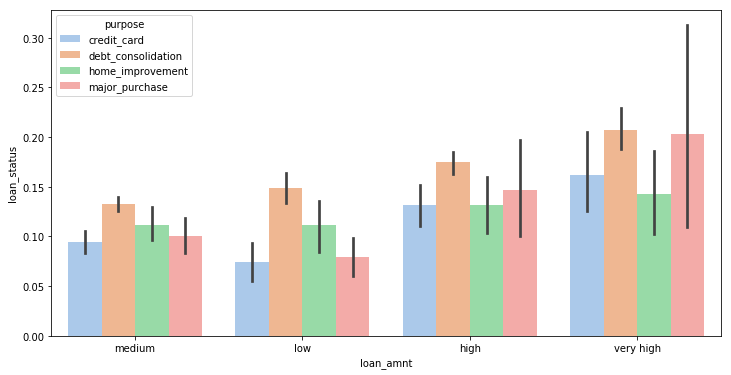

In [140]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

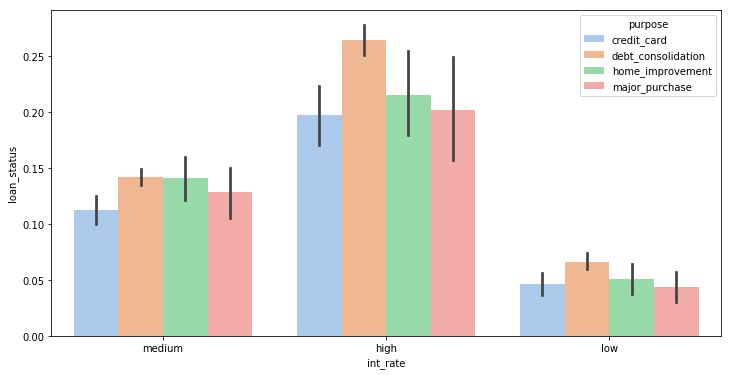

In [141]:
#int rate; low int rate has low default risk against all categories

plot_segmented('int_rate')

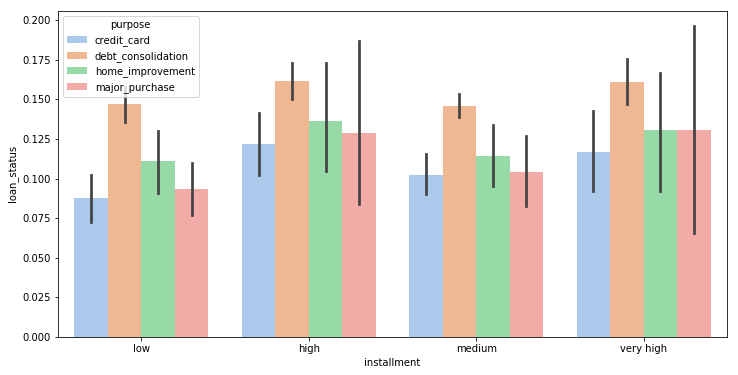

In [142]:
#installment
plot_segmented('installment')

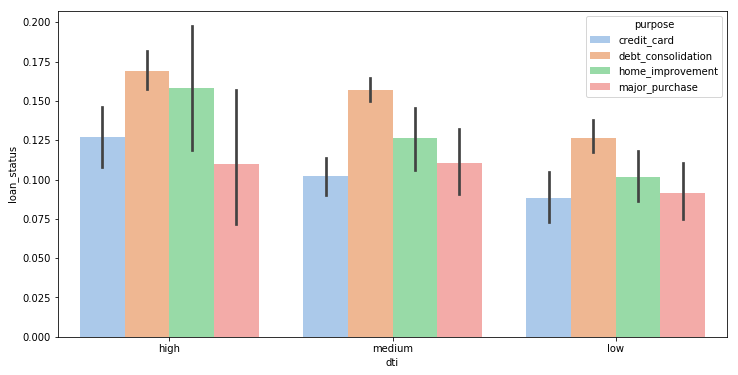

In [143]:
#debt to income ratio
plot_segmented('dti')

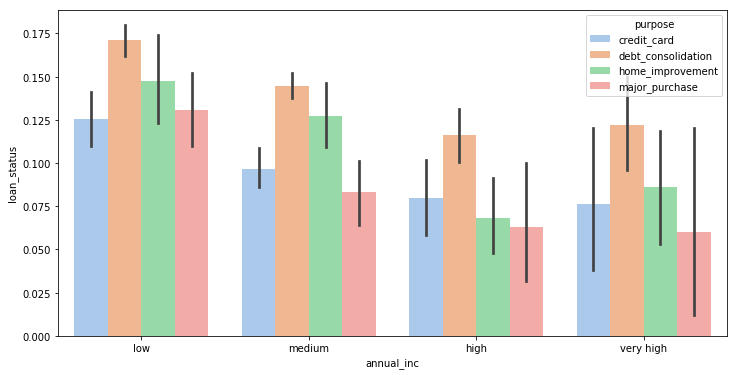

In [145]:
#annual income. We can see that debt consolidation has high default rate in all variables. 
plot_segmented('annual_inc')

*A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.*

*Let's see an example using annual_inc as the categorical variable.*

In [151]:
#checking variation of default rate against annual income

round(df.groupby('annual_inc').loan_status.mean().sort_values(ascending = False),2)


annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64

*Thus, there is a **6%** increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.*

In [158]:

print(round(df.groupby('loan_amnt').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('funded_amnt').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('term').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('int_rate').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('installment').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('grade').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('home_ownership').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('annual_inc').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('verification_status').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('purpose').loan_status.mean().sort_values(ascending = False),2))
print('\n')

print(round(df.groupby('dti').loan_status.mean().sort_values(ascending = False),2))
print('\n')


print(round(df.groupby('sub_grade').loan_status.mean().sort_values(ascending = False),2))
print('\n')

loan_amnt
very high    0.19
high         0.16
medium       0.12
low          0.12
Name: loan_status, dtype: float64


funded_amnt
high      0.18
medium    0.12
low       0.12
Name: loan_status, dtype: float64


term
 60 months    0.25
 36 months    0.10
Name: loan_status, dtype: float64


int_rate
high      0.25
medium    0.14
low       0.06
Name: loan_status, dtype: float64


installment
high         0.15
very high    0.15
medium       0.13
low          0.12
Name: loan_status, dtype: float64


grade
F    0.33
G    0.29
E    0.26
D    0.21
C    0.16
B    0.11
A    0.05
Name: loan_status, dtype: float64


home_ownership
OTHER       0.16
RENT        0.14
OWN         0.14
MORTGAGE    0.13
NONE        0.00
Name: loan_status, dtype: float64


annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64


verification_status
Verified           0.16
Source Verified    0.14
Not Verified       0.12
Name: loan_status, dtype: float64


purpo

**We can see that the major difference in the default rates is among the 'term':14%, 'int_rate': 14%, 'grade': 28%, 'sub-grade': 46%**

# Conclusion

**In summary we can say that:**

### 1. This bank should give more of short term loans as compared with long term loans. As long term loans have more chances of defaulting. 

### 2. Also loans should be given at low interest rate as the interest rate goes up the chanes of default increase. 

### 3. Grade and sub-grade should be looked at. Less loans should be given to people with bad grade as they are more likely to default. 

### 4. For verification status teams should look into the criteria as people who were verified were defaulting more than those who were not verified. 
